In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
cwd = os.getcwd()

XP_train=[]
file=open("./ocr/train-data.csv", 'r')
for l in file:
    app=[]
    for d in l.split(','):
        app.append(int(d))
    XP_train.append(app)
X_train=np.array(XP_train)

XP_test=[]
file=open("./ocr/test-data.csv", 'r')
for l in file:
    app=[]
    for d in l.split(','):
        app.append(int(d))
    XP_test.append(app)
X_test=np.array(XP_test)

YP_train=[]
file=open("./ocr/train-targets.csv", 'r')
for l in file:
    YP_train.append(l)
Y_train=np.array(YP_train)

YP_test=[]
file=open("./ocr/test-targets.csv", 'r')
for l in file:
    YP_test.append(l)
Y_test=np.array(YP_test)



<Figure size 432x288 with 0 Axes>

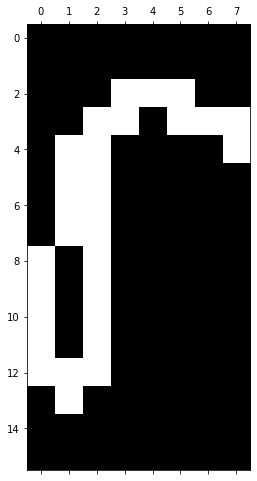

In [2]:
x = X_test[2].reshape((16, 8))

plt.gray()
plt.matshow(x)
plt.show()

In [3]:
from sklearn.svm import SVC

clf =SVC(C=10, kernel='rbf', gamma=0.1)

# Training
clf.fit(X_train, Y_train)

# Prediction
Y_pred = clf.predict(X_test)

Y_pred



array(['g\n', 'a\n', 'r\n', ..., 'p\n', 'm\n', 'c\n'], dtype='<U2')

In [ ]:
from sklearn import metrics

report = metrics.classification_report(Y_test, Y_pred)

# the support is the number of instances having the given label in y_test
print(report)
print(metrics.accuracy_score(Y_test, Y_pred))

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
    
# 3-fold cross-validation
# random_state ensures same split for each value of gamma
# KFold has a different syntax for legacy versions of scikit-learn
kf = KFold(n_splits=3, shuffle=True, random_state=42)

gamma_values = [0.1, 0.05, 0.02, 0.01]
accuracy_scores = []

# Do model selection over all the possible values of gamma 
for gamma in gamma_values:
    
    # Train a classifier with current gamma
    clf = SVC(C=10, kernel='rbf', gamma=gamma)

    # Compute cross-validated accuracy scores
    # So legacy....
    scores = cross_val_score(clf, X_train, Y_train, cv=kf.split(X_train), scoring='accuracy')
    
    # Compute the mean accuracy and keep track of it
    accuracy_score = scores.mean()
    accuracy_scores.append(accuracy_score)

# Get the gamma with highest mean accuracy
best_index = np.array(accuracy_scores).argmax()
best_gamma = gamma_values[best_index]

# Train over the full training set with the best gamma
clf = SVC(C=10, kernel='rbf', gamma=best_gamma)
clf.fit(X_train, Y_train)

# Evaluate on the test set
Y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)

print(accuracy)

In [ ]:
try:
    from sklearn.model_selection import learning_curve
except ImportError:
    from sklearn.learning_curve import learning_curve
    
    
plt.figure()
plt.title("Learning curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

clf = SVC(C=10, kernel='rbf', gamma=best_gamma)

# Compute the scores of the learning curve
# by default the (relative) dataset sizes are: 10%, 32.5%, 55%, 77.5%, 100%
# The function automatuically executes a Kfold cross validation for each dataset size
train_sizes, train_scores, val_scores = learning_curve(clf, X_train, Y_train, scoring='accuracy', cv=3)

# Get the mean and std of train and validation scores over the cv folds along the varying dataset sizes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the mean  for the training scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot the  std for the training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")

# Plot the mean  for the validation scores
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

# Plot the std for the validation scores
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.ylim(0.05,1.3)             # set bottom and top limits for y axis
plt.legend()
plt.show()